In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("./Dataset/train.csv")
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
372155,372155,502853,502854,How can you have a good day?,What does it take to have a good day?,1
72228,72228,124143,124144,"If you personally know Peter Lindgren, a forme...","What is former guitarist for Opeth, Peter Lind...",0
118528,118528,36058,179677,Has anyone ever seen a ghost in real life?,Have you ever seen ghost in your real life?,1
249830,249830,363559,363560,"If we keep an object floating in air, will we ...",What if I fly a helicopter and keep it steady ...,0
195389,195389,295817,199950,What are the smart goals?,What are smart goals?,1
202877,202877,305307,305308,What are the points of the Dalton atomic theor...,What year did Democritus discover the Atomic T...,0
139688,139688,222152,222153,How many people have gone to hell?,God: How can a loving God send people to hell?,0
6438,6438,12611,12612,How did Dumbledore gain the most powerful wand?,Who gave dumbledore the wand?,1
203182,203182,169806,14129,Did RBI confirm that GPS chips have been used ...,How the nano GPS chips (NGC) in Indian 2000 Ru...,1
402175,402175,464451,535627,What would happen if we saw the world only thr...,What would happen if for one day only the whol...,0


In [3]:
df.shape

(404290, 6)

EDA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [5]:
df.isna().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [7]:
df.duplicated().sum()

0

is_duplicate
0    255027
1    149263
Name: count, dtype: int64
is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

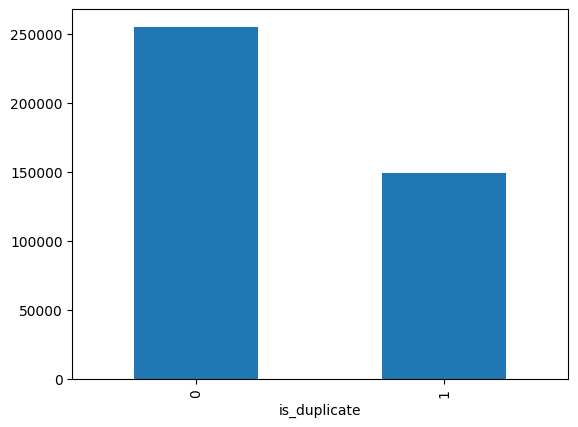

In [9]:
# Distribution of duplicate and non-nonduplicate question

print(df["is_duplicate"].value_counts())
print((df["is_duplicate"].value_counts() / df["is_duplicate"].count()) * 100)
df["is_duplicate"].value_counts().plot(kind="bar")

In [10]:
# Repeated Questions

qid = pd.Series(df["qid1"].tolist() + df["qid2"].tolist())
print("Number of unique questions", np.unique(
    qid).shape[0])  # This Questions are unique

x = qid.value_counts() > 1
# This questions are multiple times
print("Number of repeated questions", x[x].shape[0])

Number of unique questions 537933
Number of repeated questions 111780


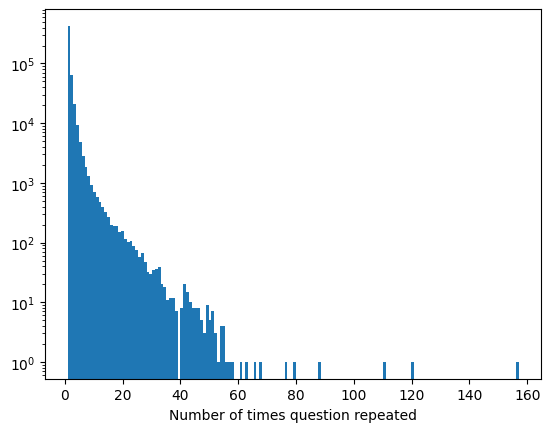

In [11]:
# Repeated questions histogram

plt.hist(qid.value_counts().values, bins=160)
plt.yscale("log")
plt.xlabel("Number of times question repeated")
plt.show()